In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("delhi-weather-data\\testset.csv")

In [6]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


### since the value of snow , percipm ,tornado,wind direction are not relevant and mean values are so small in number so drop that columns

In [7]:
df.drop([' _snow', ' _precipm',' _tornado',' _wdire'], inplace=True,axis=1)

### Make a plot of different numeric features like rain, snow, dewptm, etc. over the duration of a month or year or day.

In [8]:
df['Date'] = pd.to_datetime(df['datetime_utc'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour


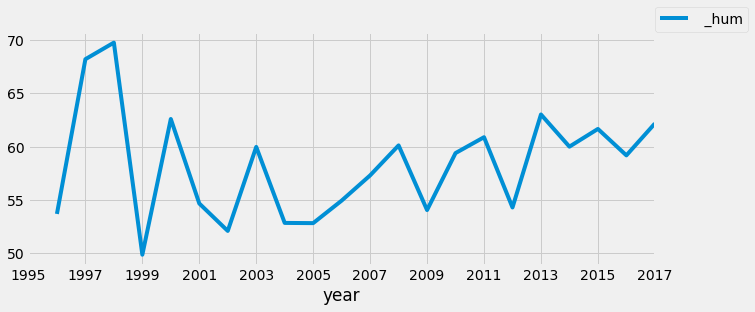

In [11]:
plt.style.use('fivethirtyeight')
humidity = df.groupby(df.year)[' _hum'].mean()
humidity.plot(figsize=(10,4))
plt.xticks(np.arange(1995,2019,2))
plt.legend(loc=(1,1))

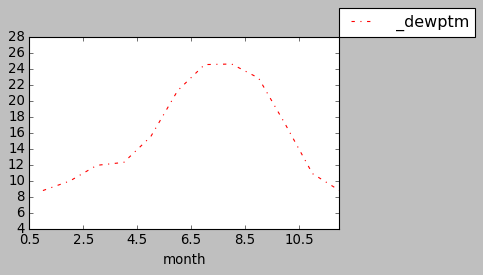

In [16]:
plt.style.use('classic')
dewyear = df.groupby(df.month)[' _dewptm'].mean()
dewyear.plot(figsize=(5,3),color='red', linewidth=1, linestyle='-.')
plt.xticks(np.arange(0.5,12.5,2))
plt.yticks(np.arange(4,30,2))
plt.legend(loc=(1,1))

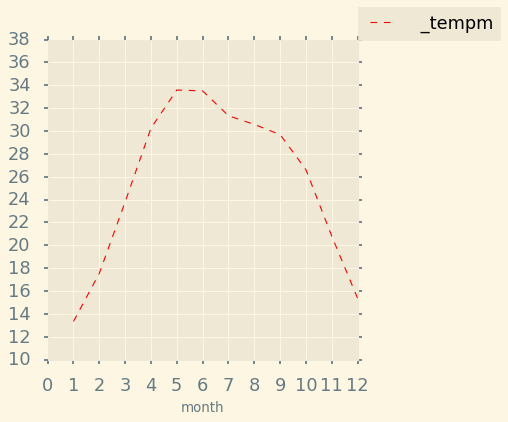

In [24]:
plt.style.use('Solarize_Light2')
tempyear = df.groupby(df.month)[' _tempm'].mean()
tempyear.plot(figsize=(5,5),color='red', linewidth=1, linestyle='--')
plt.xticks(np.arange(0,13,1))
plt.yticks(np.arange(10,40,2))
plt.legend(loc=(1,1))

In [25]:
group = df.groupby(['month'])

In [28]:
from functools import reduce

In [29]:
df.rename(columns = {" _conds": "cond"},inplace=True)

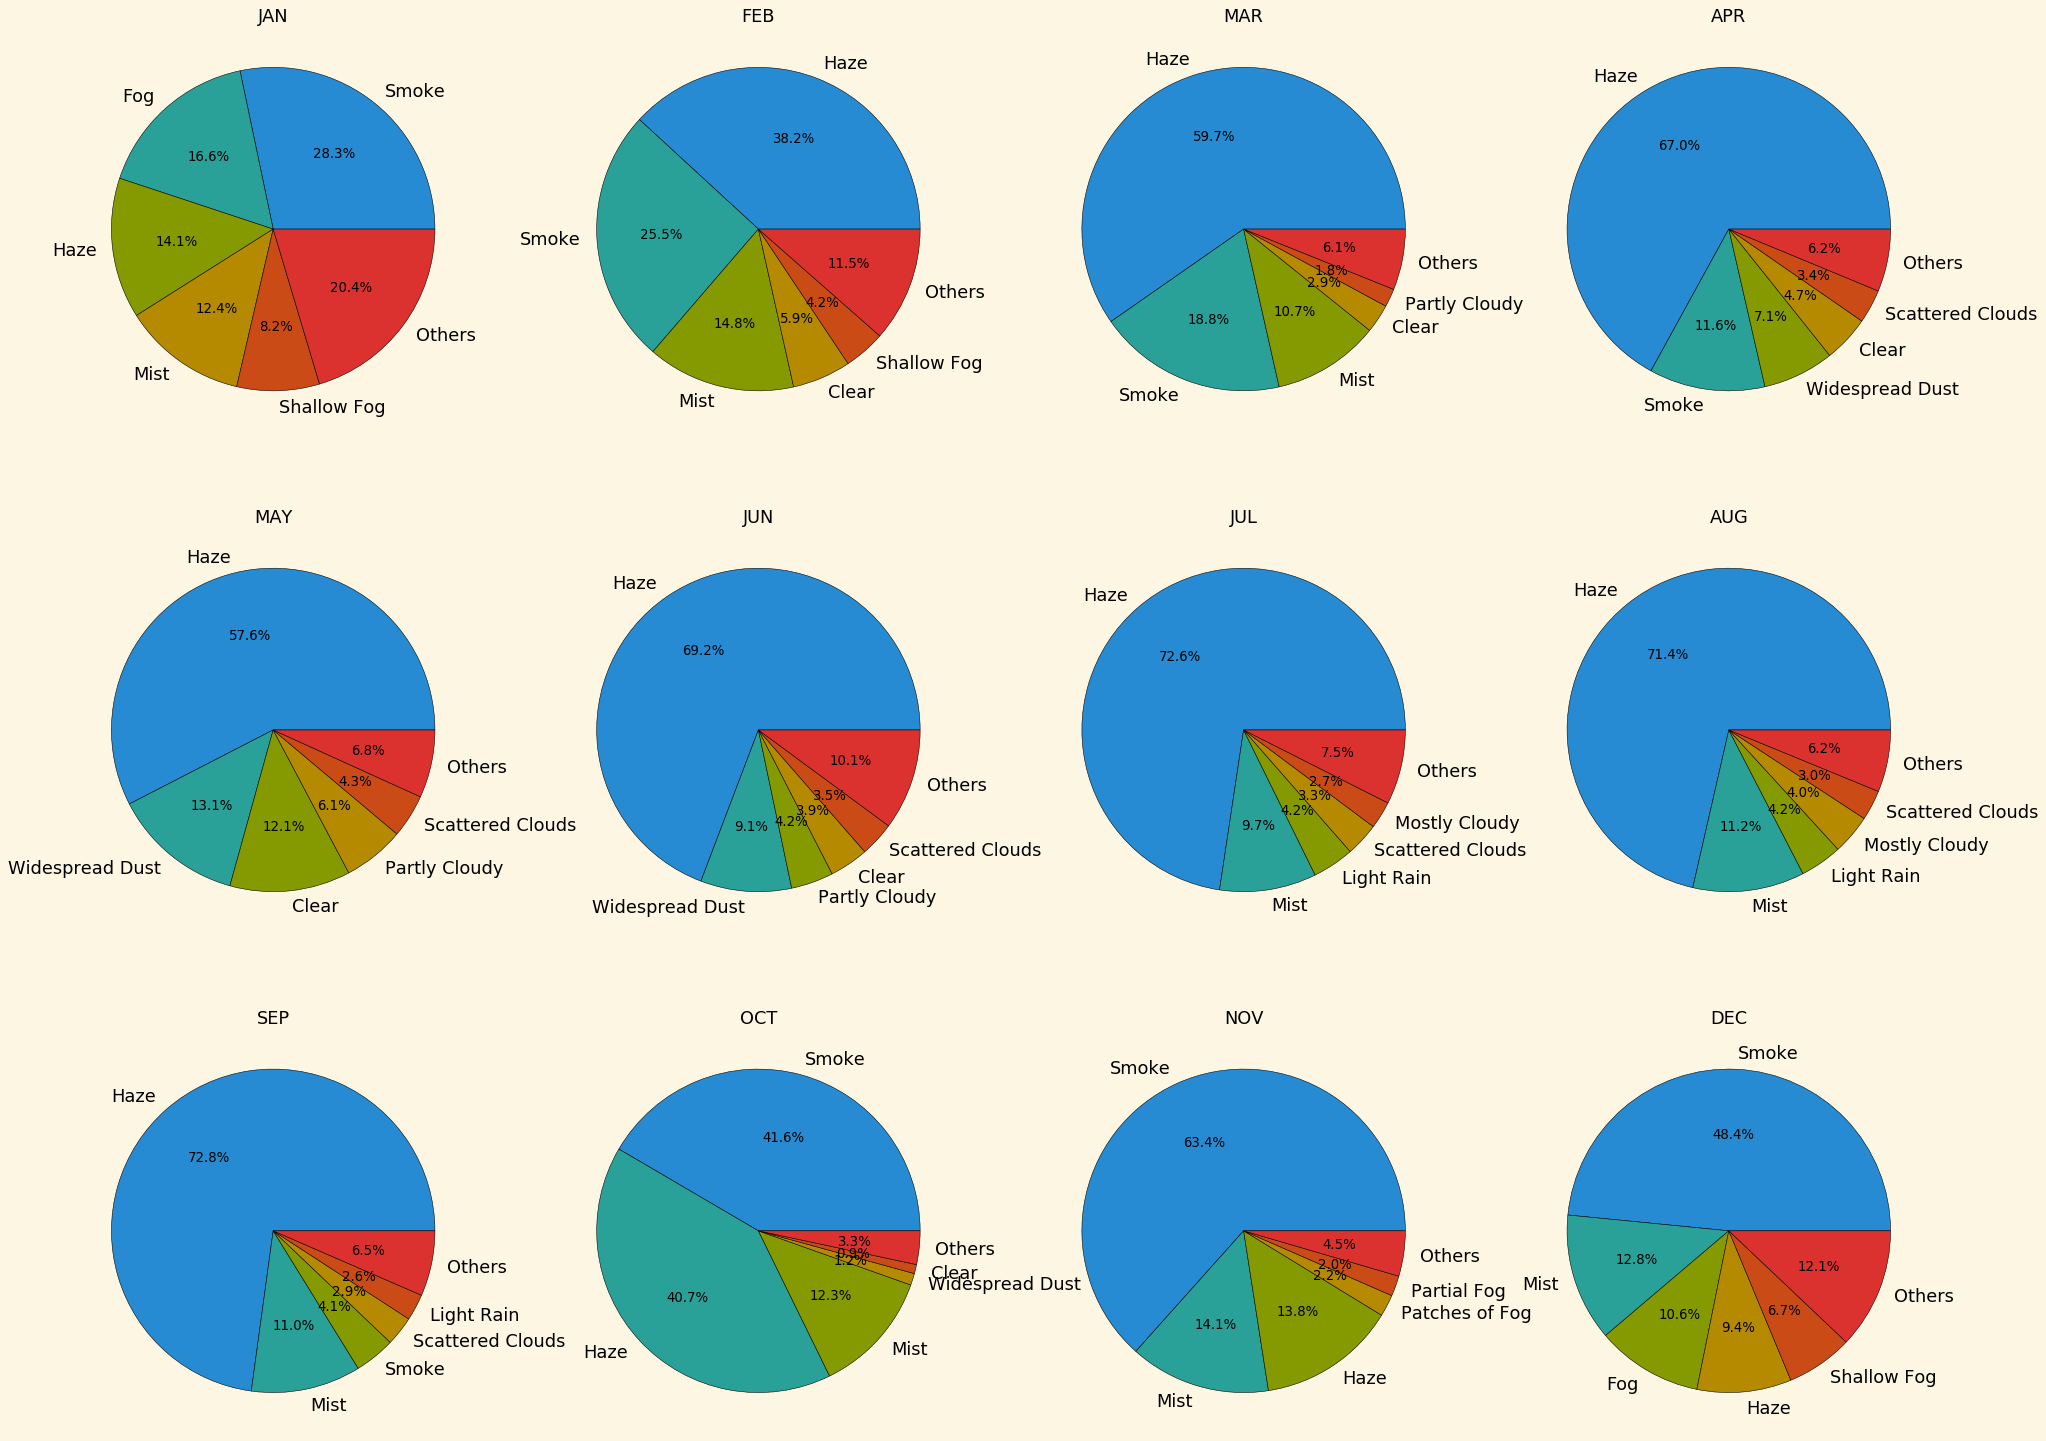

In [34]:
l = []
monthlist=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
j=0
count = int(1)
plt.subplots(figsize = (30,30))
for month,data in group:
    ab =data['cond'].value_counts()
    ab = dict(ab)
    l.append(ab)

for i in l:
    activities = list(i.keys())
    slices = list(i.values())
    activities = activities[:5]
    activities.append("Others")
    other = slices[6:]
    slices = slices[:5]
    other = reduce(lambda a,b : a+b,other)
    slices.append(other)
    plt.subplot(4,4,count)
    plt.title(monthlist[j])
    j=j+1
    count = count+1
    plt.pie(slices, labels=activities,autopct = "%1.1f%%")
plt.show()